In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install tensorflow==2.1

In [ ]:
import os, shutil
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Bangkit/chest_xray/'

In [ ]:
# split infected data into infected by virus or bacteria

# os.mkdir(path + 'VvsB')
# os.mkdir(path + 'VvsB/train')
# os.mkdir(path + 'VvsB/val')
# os.mkdir(path + 'VvsB/train/virus')
# os.mkdir(path + 'VvsB/train/bacteria')
# os.mkdir(path + 'VvsB/val/virus')
# os.mkdir(path + 'VvsB/val/bacteria')
# os.mkdir(path + 'VvsB/test')
# os.mkdir(path + 'VvsB/test/virus')
# os.mkdir(path + 'VvsB/test/bacteria')

# directory = 'test'
# for i in tqdm(os.listdir(path + '{}/PNEUMONIA'.format(directory))):
#     if i.split('_')[1] == 'virus':
#         shutil.copyfile(path + '{}/PNEUMONIA/'.format(directory) + i, path + 'VvsB/{}/virus/'.format(directory) + i)
#     if i.split('_')[1] == 'bacteria':
#         shutil.copyfile(path + '{}/PNEUMONIA/'.format(directory) + i, path + 'VvsB/{}/bacteria/'.format(directory) + i)

100%|██████████| 390/390 [03:13<00:00,  2.01it/s]


In [ ]:
split_path = path + 'VvsB'

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=20,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode = 'nearest')


test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(split_path + '/train', 
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')     

validation_generator =  test_datagen.flow_from_directory(split_path + '/test', 
                                                    target_size = (224,224),
                                                    batch_size = 32,
                                                    class_mode = 'binary')


Found 3874 images belonging to 2 classes.
Found 390 images belonging to 2 classes.


In [ ]:
print(len(os.listdir(split_path + '/train/virus')))
print(len(os.listdir(split_path + '/train/bacteria')))

1345

In [ ]:
from tensorflow.keras.applications import DenseNet121, MobileNet
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import MaxPooling2D, Dropout, Flatten, Dense, Input, Conv2D

# Model

In [ ]:
model = Sequential([
    Conv2D(8, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(),
    
    Conv2D(24, (3,3), activation='relu'),
    MaxPooling2D(),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),

    Flatten(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 222, 222, 8)       224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 8)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 16)      1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 24)        3480      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 24)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16224)            

In [ ]:
history = model.fit_generator(train_generator, epochs = 10, validation_data = validation_generator)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 122 steps, validate for 13 steps
Epoch 1/10
122/122 [==============================] - 69s 569ms/step - loss: 0.5308 - accuracy: 0.7519 - val_loss: 0.3216 - val_accuracy: 0.9077
Epoch 2/10
122/122 [==============================] - 70s 570ms/step - loss: 0.5267 - accuracy: 0.7506 - val_loss: 0.2857 - val_accuracy: 0.9103
Epoch 3/10
122/122 [==============================] - 68s 556ms/step - loss: 0.5295 - accuracy: 0.7483 - val_loss: 0.3412 - val_accuracy: 0.8974
Epoch 4/10
122/122 [==============================] - 67s 546ms/step - loss: 0.5254 - accuracy: 0.7540 - val_loss: 0.2993 - val_accuracy: 0.9103
Epoch 5/10
122/122 [==============================] - 66s 543ms/step - loss: 0.5300 - accuracy: 0.7553 - val_loss: 0.3121 - val_accuracy: 0.9179
Epoch 6/10
122/122 [==============================] - 66s 543ms/step - loss: 0.5251 - accuracy: 0.7506 - val_loss: 0.2962 - val_accuracy: 0.9154
Epoch 7/10
122/122 [=================

In [ ]:
history1 = history

In [ ]:
import matplotlib.pyplot as plt

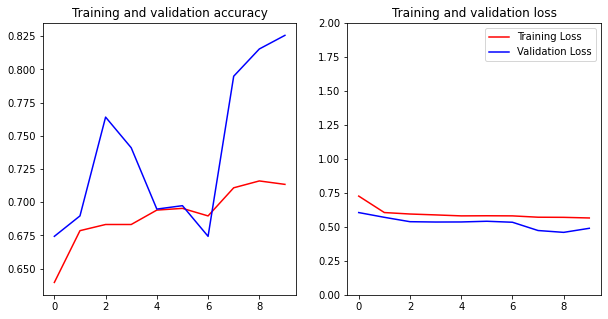

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.subplot(122)
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.ylim(0,2)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save(path + 'virus_vs_bacteria.h5')

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, path+'virus_vs_bacteria_90')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
